# load counts and transcripts per million from GEO

viewing https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE115978

In [1]:
import os

import numpy as np

import GEOparse

In [2]:
target_dir = "./data/geoparse"
os.makedirs(target_dir, exist_ok=True)

In [ ]:
%%capture

gse_115978 = GEOparse.get_GEO(geo="GSE115978", destdir=target_dir)

In [4]:
gse_115978.metadata["supplementary_file"]

['ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115978/suppl/GSE115978_cell.annotations.csv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115978/suppl/GSE115978_counts.csv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115978/suppl/GSE115978_tpm.csv.gz']

In [5]:
target_dir = "./data/ftp/GSE115978"
os.makedirs(target_dir, exist_ok=True)

In [6]:
import helpers

In [7]:
for ftp_url in gse_115978.metadata["supplementary_file"]:
    helpers.download_gz_from_ftp(ftp_url, target_dir)

In [8]:
!tree -h data/ftp

data/ftp
└── [4.0K]  GSE115978
    ├── [589K]  GSE115978_cell.annotations.csv
    ├── [ 99K]  GSE115978_cell.annotations.csv.gz
    ├── [346M]  GSE115978_counts.csv
    ├── [ 49M]  GSE115978_counts.csv.gz
    ├── [805M]  GSE115978_tpm.csv
    └── [227M]  GSE115978_tpm.csv.gz

1 directory, 6 files


In [ ]:
!head -2 data/ftp/GSE115978/GSE115978_tpm.csv

In [10]:
import pandas as pd

In [11]:
columns = pd.read_csv(
    filepath_or_buffer='./data/ftp/GSE115978/GSE115978_tpm.csv',
    nrows=1,
    index_col=0
).columns

dtypes = {col: np.float16 for col in columns}
dtypes['GENE'] = str

In [12]:
df_tpm = pd.read_csv(
    filepath_or_buffer='./data/ftp/GSE115978/GSE115978_tpm.csv',
#     nrows=10000,
    dtype=dtypes,
    index_col=0
)

In [13]:
df_tpm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23686 entries, C9orf152 to AQP7
Columns: 7186 entries, cy78_CD45_neg_1_B04_S496_comb to CY75_1_CD45_CD8_8__S351_comb_BCD8
dtypes: float16(7186)
memory usage: 324.8+ MB


In [14]:
list(sorted(df_tpm.columns))[:50]

['CY106_CD45neg_CD90neg_10cells_S289',
 'CY106_CD45neg_CD90neg_S291',
 'CY106_CD45neg_CD90neg_S292',
 'CY106_CD45neg_CD90neg_S294',
 'CY106_CD45neg_CD90neg_S297',
 'CY106_CD45neg_CD90neg_S301',
 'CY106_CD45neg_CD90neg_S302',
 'CY106_CD45neg_CD90neg_S308',
 'CY106_CD45neg_CD90neg_S310',
 'CY106_CD45neg_CD90neg_S320',
 'CY106_CD45neg_CD90neg_S323',
 'CY106_CD45neg_CD90neg_S326',
 'CY106_CD45neg_CD90neg_S327',
 'CY106_CD45neg_CD90neg_S328',
 'CY106_CD45neg_CD90neg_S338',
 'CY106_CD45neg_CD90neg_S341',
 'CY106_CD45neg_CD90neg_S344',
 'CY106_CD45neg_CD90neg_S354',
 'CY106_CD45neg_CD90neg_S356',
 'CY106_CD45neg_CD90neg_S365',
 'CY106_CD45neg_CD90neg_S366',
 'CY106_CD45neg_CD90neg_S374',
 'CY106_CD45neg_CD90neg_S378',
 'CY106_CD45neg_CD90neg_S382',
 'CY116CD45neg_CD90neg_S196',
 'CY116CD45neg_CD90neg_S284',
 'CY58_1_CD45_A02_S962_comb',
 'CY58_1_CD45_A03_S963_comb',
 'CY58_1_CD45_A04_S964_comb',
 'CY58_1_CD45_A05_S965_comb',
 'CY58_1_CD45_A06_S966_comb',
 'CY58_1_CD45_A07_S967_comb',
 'CY58_1

In [15]:
import plotly.express as px

In [16]:
cells_percent_nonzero = df_tpm.astype(bool).mean(axis=0)
cells_percent_nonzero

cy78_CD45_neg_1_B04_S496_comb                      0.348645
cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb           0.086422
CY88_5_B10_S694_comb                               0.226927
cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb    0.238453
cy78_CD45_neg_3_H06_S762_comb                      0.312801
                                                     ...   
CY75_1_CD45_CD8_3__S168_comb_BCD8                  0.149033
CY75_1_CD45_CD8_8__S338_comb_BCD8                  0.163472
monika_D7_S132_comb_BCD8_3                         0.193743
CY75_1_CD45_CD8_8__S289_comb_BCD8                  0.194799
CY75_1_CD45_CD8_8__S351_comb_BCD8                  0.162923
Length: 7186, dtype: float64

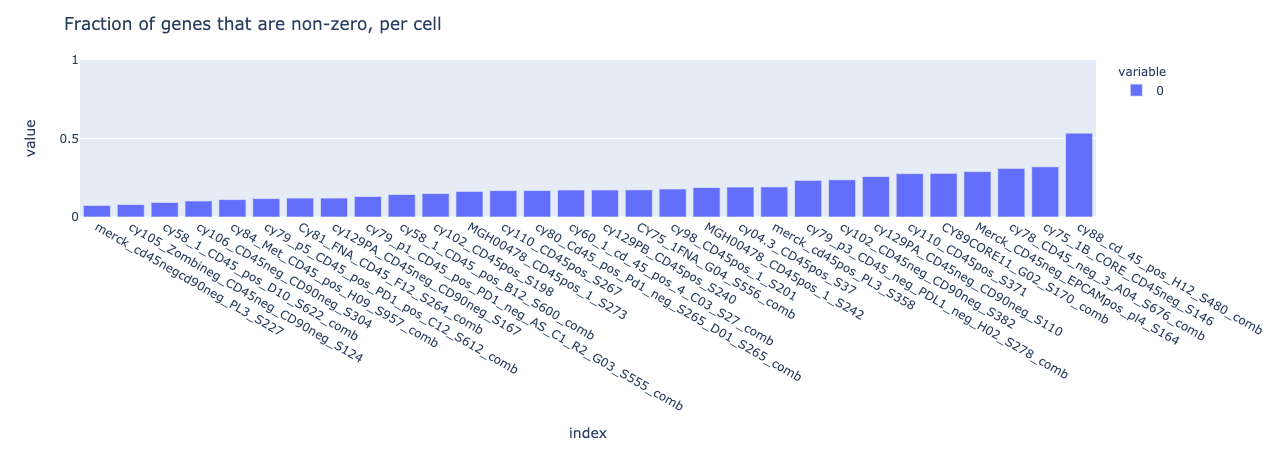

In [17]:
fig = px.bar(cells_percent_nonzero.sample(n=30).sort_values())

fig.update_layout(
    title='Fraction of genes that are non-zero, per cell',
)

fig.update_yaxes(range=[0, 1])

fig.show(renderer='jupyterlab+png')

In [18]:
genes_percent_nonzero = df_tpm.astype(bool).mean(axis=1)
genes_percent_nonzero

C9orf152    0.009741
RPS11       0.967854
ELMO2       0.292096
CREB3L1     0.009880
PNMA1       0.192179
              ...   
PIK3IP1     0.423045
SNRPD2      0.649596
SLC39A6     0.300306
CTSC        0.964793
AQP7        0.007375
Length: 23686, dtype: float64

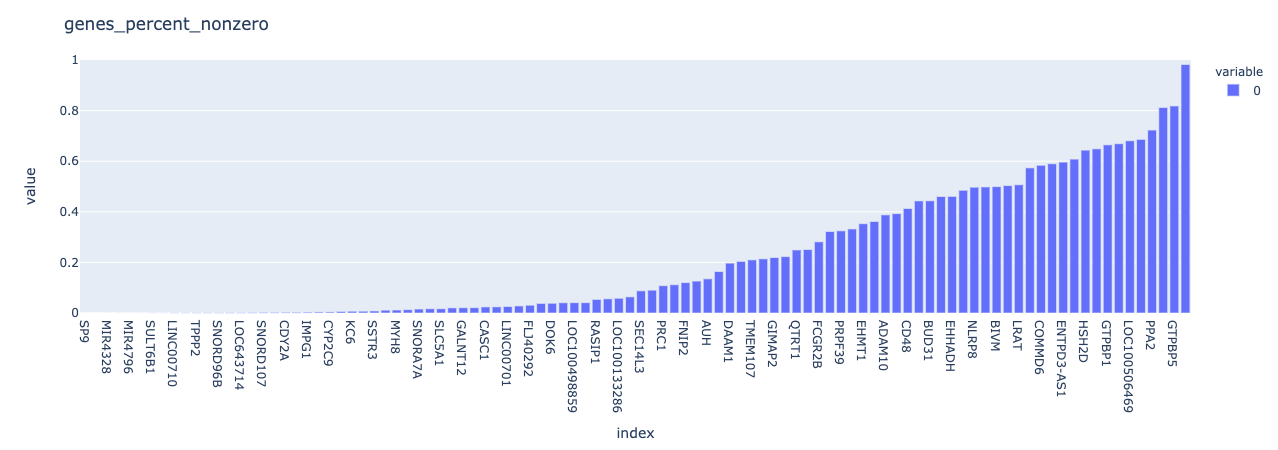

In [19]:
fig = px.bar(genes_percent_nonzero.sample(n=100).sort_values())

fig.update_layout(
    title='genes_percent_nonzero',
)

fig.update_yaxes(range=[0, 1])

fig.show(renderer='jupyterlab+png')

In [20]:
df_cell_annotations = pd.read_csv(
    "./data/ftp/GSE115978/GSE115978_cell.annotations.csv",
)
df_cell_annotations = df_cell_annotations.sort_values(["samples", "cells"])
df_cell_annotations = df_cell_annotations.set_index("cells")

In [21]:
df_cell_annotations

,samples,cell.types,treatment.group,Cohort,no.of.genes,no.of.reads
cells,,,,,,
cy04.3_CD45pos_S1,Mel04.3,T.cell,post.treatment,New,8327,1421661
cy04.3_CD45pos_S11,Mel04.3,T.CD4,post.treatment,New,6413,121641
cy04.3_CD45pos_S12,Mel04.3,T.CD8,post.treatment,New,3916,1246308
cy04.3_CD45pos_S14,Mel04.3,T.CD8,post.treatment,New,4417,671184
cy04.3_CD45pos_S15,Mel04.3,B.cell,post.treatment,New,4481,914028
...,...,...,...,...,...,...
cy98_CD45pos_CD8pos_S91,Mel98,T.cell,post.treatment,New,5969,589227
cy98_CD45pos_CD8pos_S92,Mel98,T.CD8,post.treatment,New,4823,694401
cy98_CD45pos_CD8pos_S93,Mel98,T.CD8,post.treatment,New,4647,267551


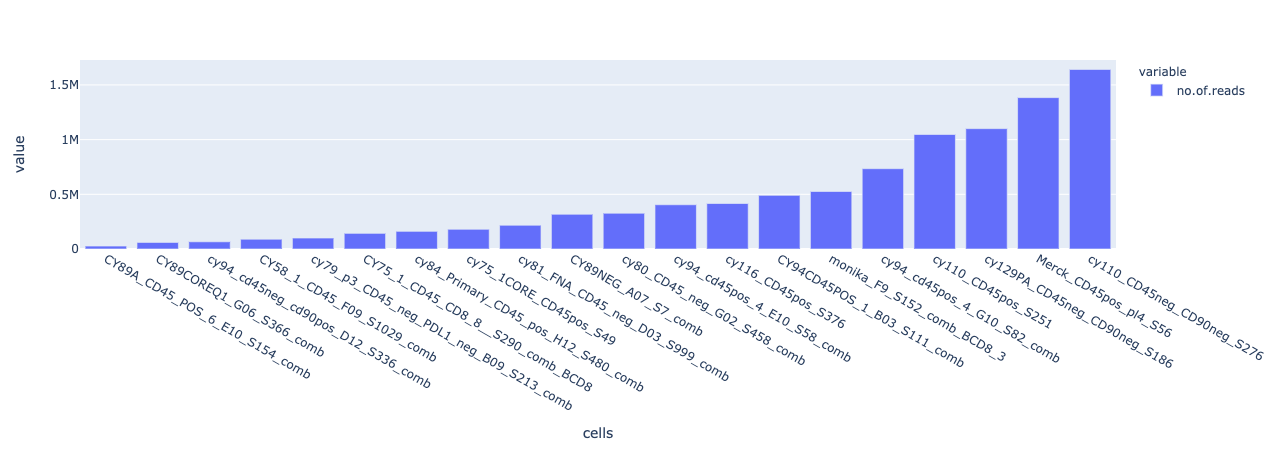

In [22]:
fig = px.bar(df_cell_annotations["no.of.reads"].sample(20).sort_values())

fig.show(renderer='jupyterlab+png')

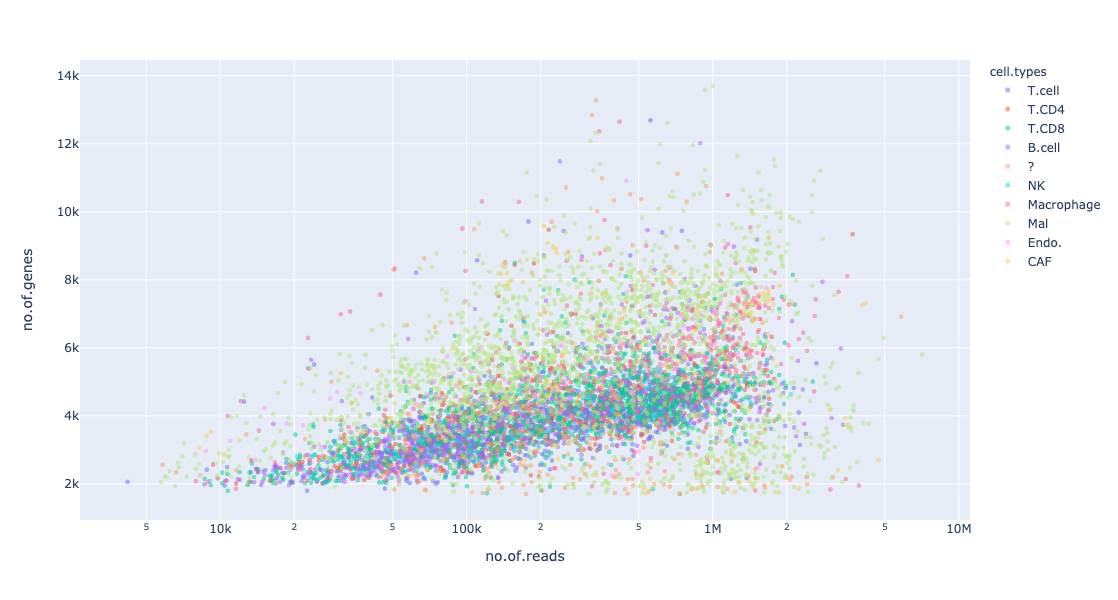

In [31]:
fig = px.scatter(
    df_cell_annotations,
    x="no.of.reads", 
    y="no.of.genes",
    trendline="OLS",
    color="cell.types",
    opacity=0.5,
)

fig.update_traces(
    marker=dict(size=5),
    selector=dict(mode='markers')
)

fig.update_xaxes(
    type="log"
)

fig.update_layout(height=600)

fig.show(renderer='jupyterlab+png')

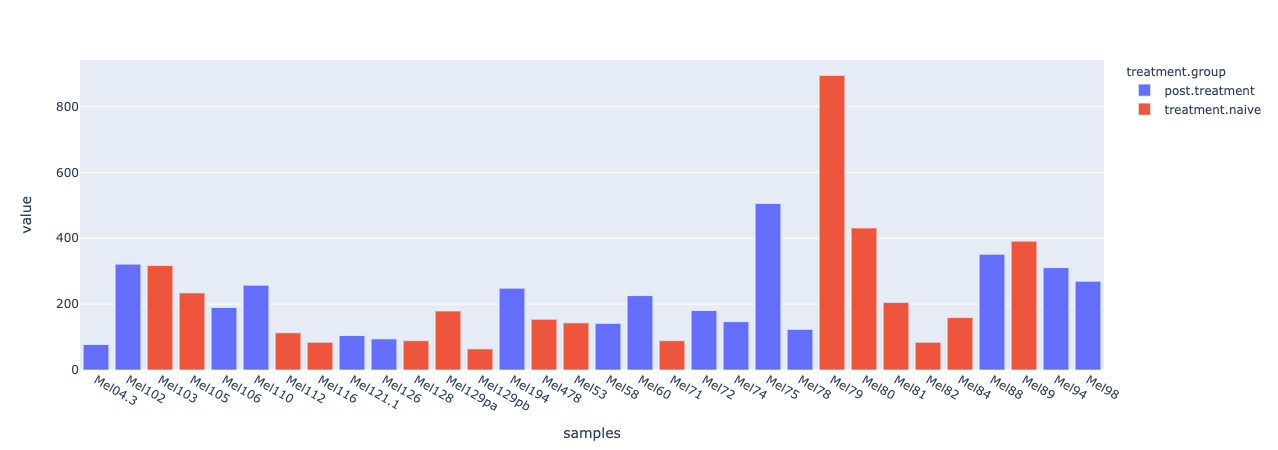

In [25]:
fig = px.bar(
    df_cell_annotations.pivot_table(index="samples", columns="treatment.group", aggfunc='size', fill_value=0)
)

fig.show(renderer='jupyterlab+png')

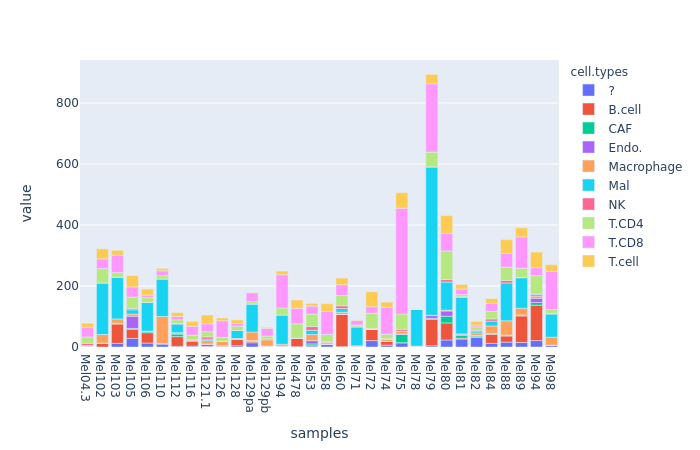

In [26]:
fig = px.bar(
    df_cell_annotations.pivot_table(index="samples", columns="cell.types", aggfunc='size', fill_value=0)
)

fig.show(renderer='jupyterlab+png')

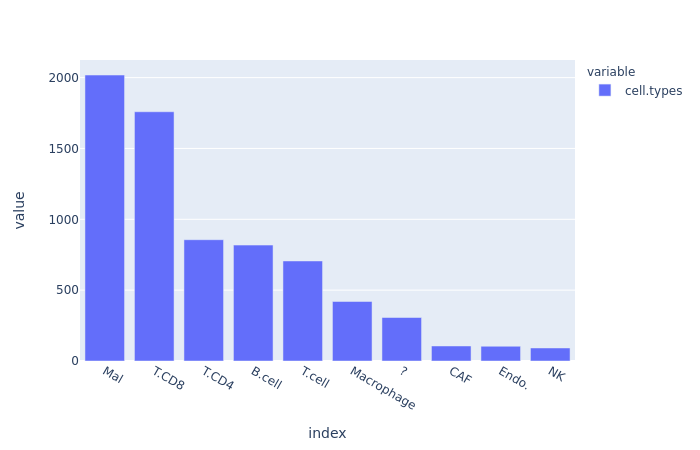

In [27]:
fig = px.bar(
    df_cell_annotations["cell.types"].value_counts()
)

fig.show(renderer='jupyterlab+png')

In [28]:
# average nonzero rate

df_tpm.astype(bool).values.mean()

0.19325059382191145